- ENVISIONING THE ANSWER:
- Asking Question 
- Search for info 
- structure data 
- Envision the answer
- Represent the visualizaion
- Tell The story


- Introduction 
- Motivation  

- Question 
- Data Set Description 

- Data Processing ####
- Visualization/Description
- Quantitative Analysis (numbers)
- Qualitative Analysis (characters)

- Analysis

- Conclusion

# <span style="color:#ff4238;">__CP321 FINAL Project__</span>

#### Authors: Lucas Duncan, Owen Macgowan

#### Date: April 2024

![Friends](https://qph.cf2.quoracdn.net/main-qimg-55f2935b1d162eb07783e02013ca66e9-lq)

---
## <span style="color:#42a2d6;">__Summary of Contents__</span>
#### __Our Final project will cover the following topics:__
1. Introduction + Motivation
2. Research Question
3. Data Set Description + Importing
4. Data Processing
5. Analysis + Visualizations
6. Conclusions

# <span style="color:#f6be00;">__1. Introduction + Motivation__</span>

#### The frequency of dialogue, as well as the tone of that dialogue (specically exclamatory dialogue) plays an instrumental role in the plot, emotion, and story of a movie or tv show. These unpinning components of a good tv show, largely impact the perception of the story by the viewer, and subsequently rater, externalized through a rating.

#### As both avid enjoyers of the tv show FRIENDS, we were curious to see what impact the dialogue trends, (some of the most memorable plot in tv history) had on the rating of the episode to which they belonged


# <span style="color:#06bef0;">__2. Research Question__</span>

### How do trends in speech, specically exclamatory speech, and dialogue length effect episode rating in the series friends.


# <span style="color:#f6beff;">__3. Data Set Importing + Description__</span>

#### The 2 datasets we will use for this project are 2 datasets about the FRIENDS tv show, both from the "rfordatascience" github account (source approved via email)

### Dialogue:  (Data Set 1/2)

#### A dataset representing each contigious line of dialogue within the show, it marks the exact dialogue used "text", the name of the character who said it, "speaker", the "season" and "episode" it occurs in, as well as the numbered "scene" within its episode it belongs to, and its index in that scene "utterance". 

#### NOTE: This dataset also contains rows about scene directions, and background events and noises, which are irrelevant for our purposes, and thus we remove them almost immediatly (see below).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dialogue = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends.csv"))
dialogue.sample(2)

,text,speaker,season,episode,scene,utterance
20867,Hey.,Chandler Bing,4,4,9,9
22121,Oh!,Rachel Green,4,9,1,13


### Episode Info: (Dataset 2/2)

#### A dataset representing episode level information/statistics for every "season" and "episode". Within each row ("episode"), its episode "title", director name ("directed_by"), and writter ("written_by") are given, as well as its "air_date", the viewing numbers of that airing ("us_views_million"), and its rating by IMDB ("imdb_rating")

In [4]:
episodes = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends_info.csv"))
episodes.sample(2)

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
124,6,4,The One Where Joey Loses His Insurance,Gary Halvorson,Andrew Reich & Ted Cohen,1999-10-14,21.1,8.5
144,6,24,The One with the Proposal,Kevin S. Bright,Shana Goldberg-Meehan & Scott SilveriAndrew Re...,2000-05-18,30.7,8.8


# <span style="color:#00be00;">__4. Data Processing__</span>

In [9]:
#Filters Out Non Dialogue Rows
all_dialogue = dialogue[~dialogue["speaker"].isin(["Scene Directions", "#ALL#", "NA"])]

# 6 Main Character Names Divided By Gender
main_character_names_male = ["Ross Geller", "Chandler Bing", "Joey Tribbiani"]
main_character_names_female = ["Monica Geller", "Phoebe Buffay", "Rachel Green"]




def exclam_size(text):

    return (text.str.contains(r'[A-Z]{2,}') | text.str.contains(r'!')).sum()

In [22]:

#Groups data by episode
dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).apply(lambda x: pd.Series({
        "total_dialogue": x["text"].size,
        "total_dialogue_male" : x.loc[x["speaker"].isin(main_character_names_male)]["text"].size,
        "total_dialogue_female" : x.loc[x["speaker"].isin(main_character_names_female)]["text"].size,
        "total_exclam": exclam_size(x["text"]),
        "total_exclam_male" : exclam_size(x.loc[x["speaker"].isin(main_character_names_male)]["text"]),
        "total_exclam_female" : exclam_size(x.loc[x["speaker"].isin(main_character_names_female)]["text"])
         
})).reset_index().sort_values(by=["season", "episode"])
                                                                                                                                                                                                            
dialogue_stats_by_episode.head(2)

C:\Users\ldunc\AppData\Local\Temp\ipykernel_13024\293093639.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).apply(lambda x: pd.Series({


,season,episode,total_dialogue,total_dialogue_male,total_dialogue_female,total_exclam,total_exclam_male,total_exclam_female
0,1,1,292,125,140,72,27,40
1,1,2,241,92,80,54,13,22


In [23]:
#Merges with reviews
joined_table = pd.merge(dialogue_stats_by_episode, episodes, on=["season", "episode"]).drop(columns=["title", "directed_by", 
                                                                                                     "written_by", "air_date", "us_views_millions"])
joined_table.head(3)

,season,episode,total_dialogue,total_dialogue_male,total_dialogue_female,total_exclam,total_exclam_male,total_exclam_female,imdb_rating
0,1,1,292,125,140,72,27,40,8.3
1,1,2,241,92,80,54,13,22,8.1
2,1,3,237,97,116,51,26,22,8.2


# <span style="color:#ff0000;">__5. Analysis + Visualizations__</span>

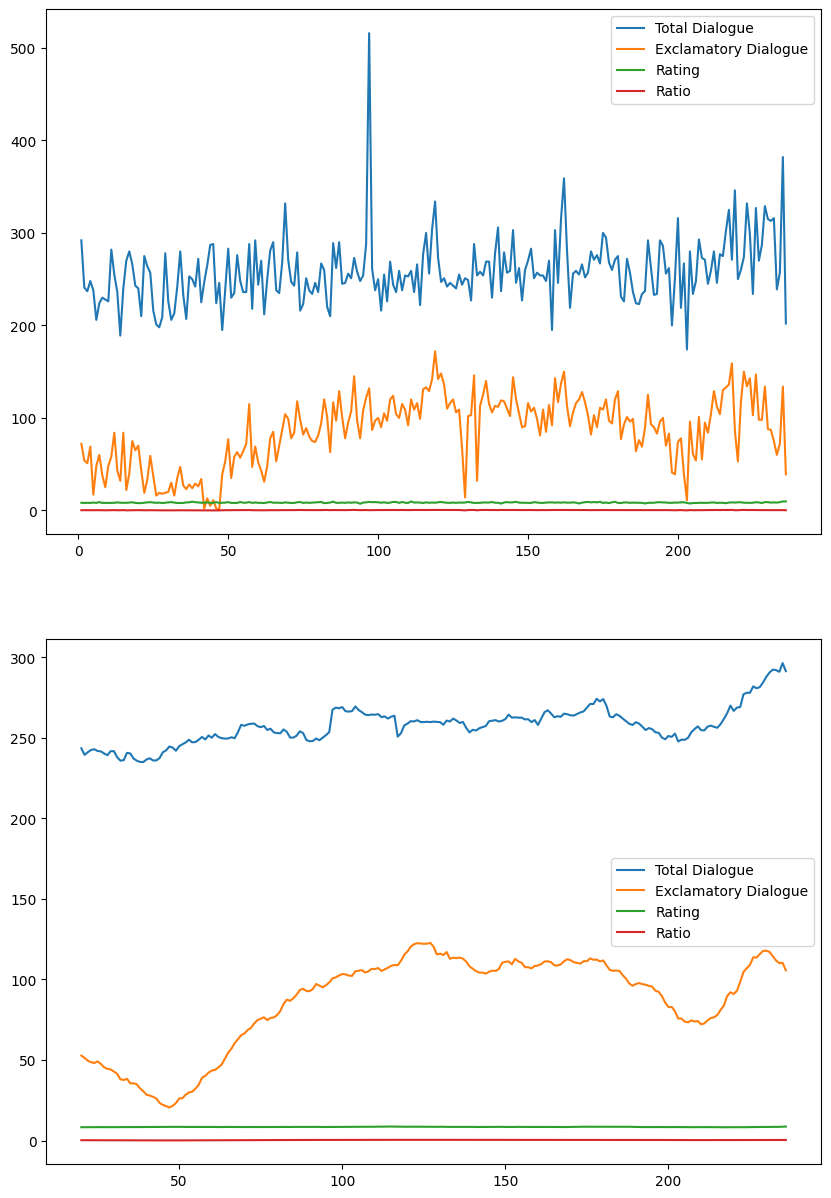

In [ ]:
#Sample Line Plot + Trend Line

total = joined_table["total_dialogue"]
exclam = joined_table["total_exclamatory_dialogue"]
rating = joined_table["imdb_rating"]
ratio = exclam/total


normalized_total = total #(total - total.min())/(total.max() - total.min())   
normalized_exclam = exclam  #(exclam - exclam.min())/(exclam.max() - exclam.min())
normalized_rating = rating #(rating - rating.min())/(rating.max() - rating.min())
normalized_ratio = ratio #(ratio - ratio.min())/(ratio.max() - ratio.min())

window = 20

rolling_average_total = normalized_total.rolling(window=window).mean()
rolling_average_exclam = normalized_exclam.rolling(window=window).mean()
rolling_average_rating = normalized_rating.rolling(window=window).mean()
rolling_average_ratio = normalized_ratio.rolling(window=window).mean()



fig, axs = plt.subplots(2, figsize=(10, 15))

axs[0].plot(range(1, len(joined_table) + 1), normalized_total, label="Total Dialogue")
axs[0].plot(range(1, len(joined_table) + 1), normalized_exclam, label="Exclamatory Dialogue")
axs[0].plot(range(1, len(joined_table) + 1), normalized_rating, label="Rating")
axs[0].plot(range(1, len(joined_table) + 1), normalized_ratio, label="Ratio")
axs[0].legend()

axs[1].plot(range(1, len(joined_table) + 1), rolling_average_total, label="Total Dialogue")
axs[1].plot(range(1, len(joined_table) + 1), rolling_average_exclam, label="Exclamatory Dialogue")
axs[1].plot(range(1, len(joined_table) + 1), rolling_average_rating, label="Rating")
axs[1].plot(range(1, len(joined_table) + 1), rolling_average_ratio, label="Ratio")
axs[1].legend()

# <span style="color:#06fee0;">__6. Conclusions__</span>

DATA SET: (data set description, search for info, structuring????????)

DATA PRE PROCESSING:

RESULTING VISUALIZATIONS:

In [ ]:




#Removes Non Dialogue:
verbal_dialogue = dialogue[~dialogue["speaker"].isin(["Scene Directions", "#ALL#", "NA"])]

#Main Character Names
main_character_names = ["Ross Geller", "Monica Geller",
                        "Phoebe Buffay", "Chandler Bing",
                        "Joey Tribbiani", "Rachel Green"]


#Functions For Later
def total_words(x):
    return x.str.len().sum()

def total_lines(x):
    return len(x)

def total_lines_of_exclamation(x):
    
    return len(x[x.str.contains(r'[A-Z]{2,}') | x.str.contains(r'!')])


#TOTAL WORDS / LINES BY SCENE
total_lines_words_by_scene = verbal_dialogue.groupby(["season", "episode", "scene"])["text"].agg([total_words, total_lines])
total_lines_words_per_episode = total_lines_words_by_scene.rename(columns={"total_words":"scene_total_words", "total_lines": "scene_total_lines"})


#Stats on Unique Main Character Dialogue
main_character_dialogue = verbal_dialogue[verbal_dialogue["speaker"].isin(main_character_names)]
main_character_stats = main_character_dialogue.groupby(["season", "episode", "scene", "speaker"])["text"].agg([total_words, total_lines, total_lines_of_exclamation]).reset_index()

#Stats on Aggregate Other Character Dialogue
other_character_dialogue = verbal_dialogue[~verbal_dialogue["speaker"].isin(main_character_names)]
other_character_stats = other_character_dialogue.groupby(["season", "episode", "scene"])["text"].agg([total_words, total_lines, total_lines_of_exclamation]).reset_index()
other_character_stats.insert(2, "speaker", "Other")


#Join stats of main_character and other_characters
all_absolute_stats = pd.concat([main_character_stats, other_character_stats])

#Join Character stats with episode overall
joined_stats = pd.merge(all_absolute_stats, total_lines_words_per_episode,how = 'right', on=["episode", "season"])

#Merge With Overall Episode info
by_scene_character = pd.merge(joined_stats, episodes, how='right', on=["episode", "season"]).sort_values(by=["season", "episode", "scene", "speaker"])

joined_stats.sample(4)








,season,episode,scene,speaker,total_words,total_lines,total_lines_of_exclamation,scene_total_words,scene_total_lines
100837,7,13,4,Monica Geller,363,6,2,774,14
107414,7,24,8,Rachel Green,185,2,1,438,3
120584,9,4,3,Ross Geller,102,4,0,1326,21
42690,3,20,11,Monica Geller,18,1,1,458,12


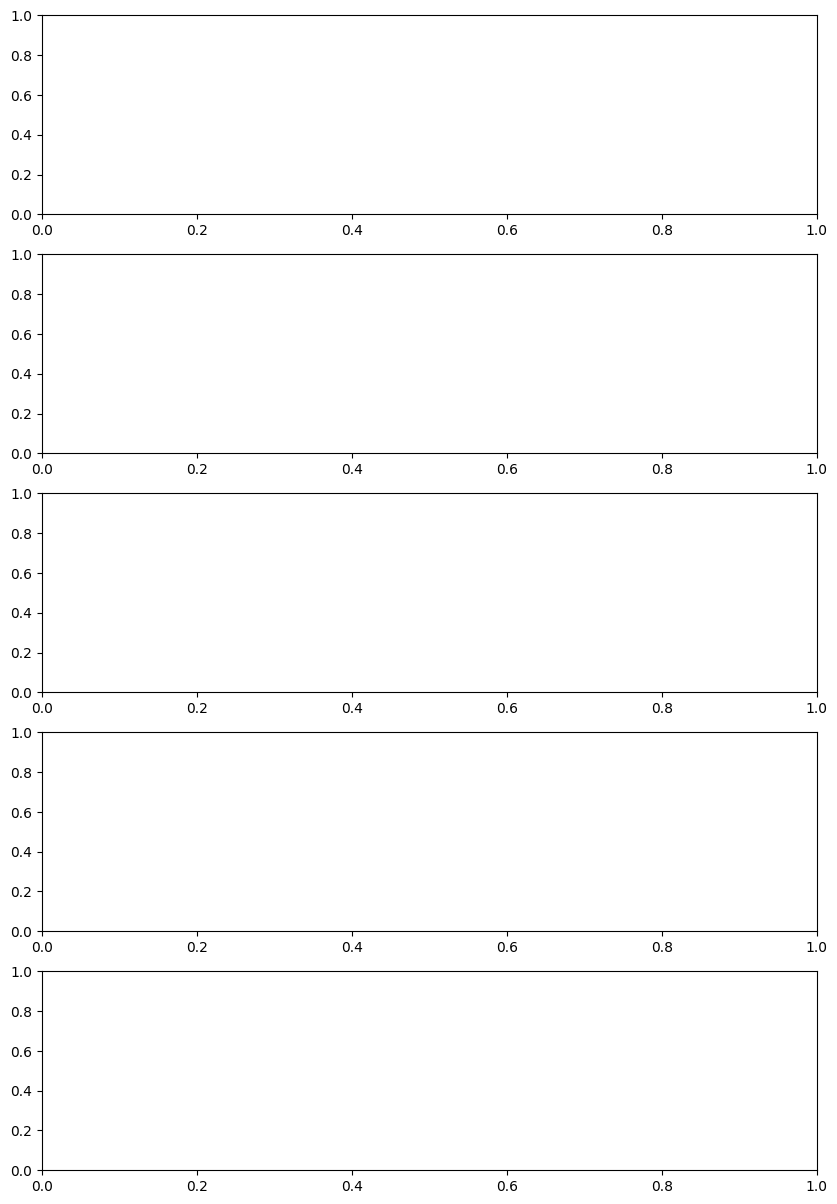

In [ ]:
#INSIGHT INTO SHOW OVERALL
fig, axs = plt.subplots(5, figsize=(10, 15))


#IVE ADDED SOME EXAMPLE BELOW

KeyError: 'episode_total_words'

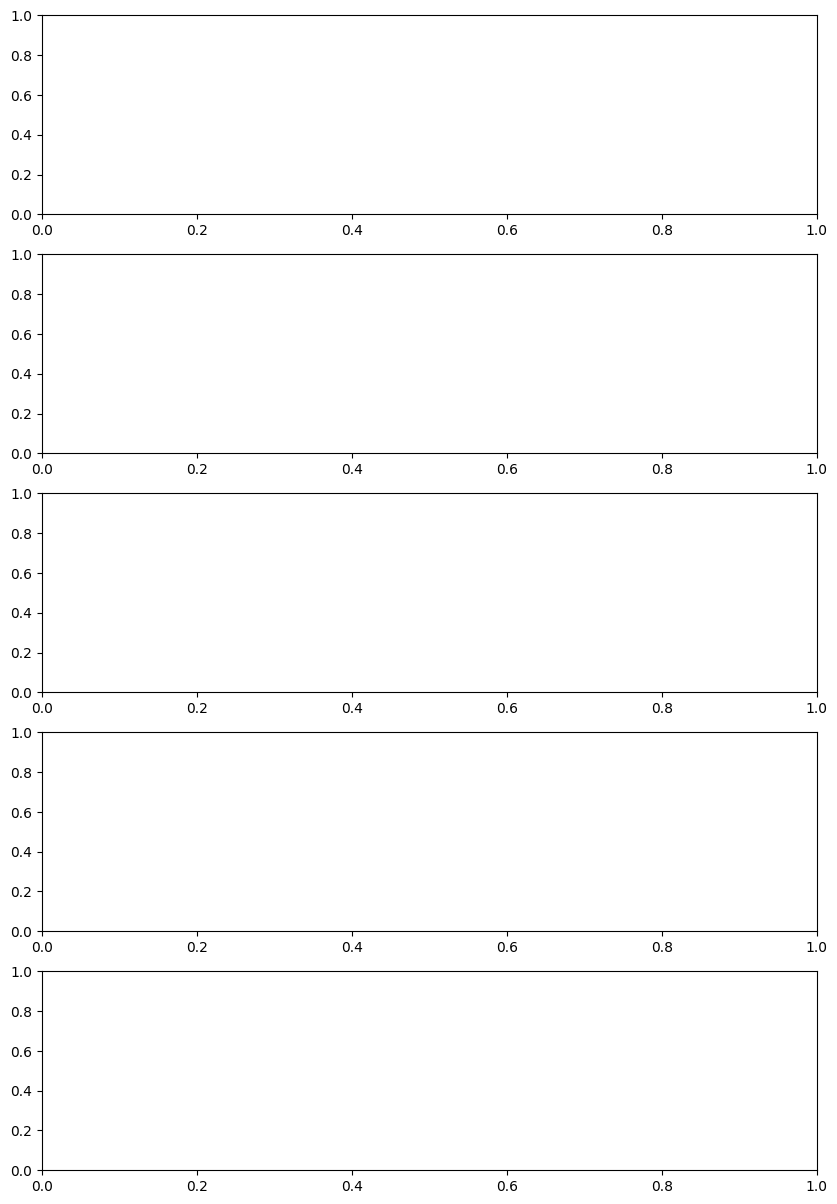

In [ ]:
main_character_names.append("Other")
fig, axs = plt.subplots(5, figsize=(10, 15))

axs[3].plot(range(0, len(total_lines_words_per_episode)), total_lines_words_per_episode["episode_total_words"])
axs[4].plot(range(0, len(total_lines_words_per_episode)), total_lines_words_per_episode["episode_total_lines"])

# RATIO OF EXCLAMATORY WORDS PER EPISODE
for name in main_character_names:

    rows_to_consider = joined_stats[joined_stats["speaker"] == name]


    #ADDS Ratio Of Exclamatory Statements
    ratio_of_exclamation = rows_to_consider["total_words_of_exclamation"]/rows_to_consider["total_words"]
    rolling_avg = ratio_of_exclamation.rolling(window=5).mean()
    axs[0].plot(range(0, len(rows_to_consider)), rolling_avg, label=f"{name} Rolling Avg")


    #ADDS Ratio Of Total Words Statements
    ratio_of_exclamation = rows_to_consider["total_words"]/rows_to_consider["episode_total_words"]
    rolling_avg = ratio_of_exclamation.rolling(window=5).mean()
    axs[1].plot(range(0, len(rows_to_consider)), rolling_avg, label=f"{name} Rolling Avg")


    #ADDS Ratio Of Word/Statment
    ratio_of_exclamation = rows_to_consider["total_words"]/rows_to_consider["total_lines"]
    rolling_avg = ratio_of_exclamation.rolling(window=5).mean()
    axs[2].plot(range(0, len(rows_to_consider)), rolling_avg, label=f"{name} Rolling Avg")

